# **Exploratory Data Analysis**


In this module we get to work with the cleaned dataset from the previous module.

We will perform the task of exploratory data analysis.
We will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


<h2>Read Data</h2>
<p>
Import the pandas module and utilize the <code>pandas.read_csv()</code> function for reading CSV files. 
</p>


In [3]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [36]:
df_numerical = df.select_dtypes(include=[np.number]) # romove non numerical categories
# Compute summary statistics
summary_stats = df_numerical.describe().T  # Transpose for better readability
summary_stats['median'] = df_numerical.median()
summary_stats['mode'] = df_numerical.mode().iloc[0] 
print(summary_stats)

                 count           mean           std   min       25%      50%  \
Respondent     11398.0   12490.392437  7.235462e+03   4.0   6264.25  12484.0   
YearsCode      11370.0      12.383113  8.108504e+00   1.0      6.00     10.0   
YearsCodePro   10896.0       7.916575  6.596682e+00   1.0      3.00      6.0   
CompTotal      10589.0  757047.725564  9.705598e+06   0.0  25000.00  65000.0   
ConvertedComp  10582.0  131596.731620  2.947865e+05   0.0  26868.00  57745.0   
WorkWeekHrs    11276.0      42.064606  2.467274e+01   3.0     40.00     40.0   
CodeRevHrs      8972.0       4.781071  4.567060e+00   0.0      2.00      4.0   
Age            11111.0      30.778895  7.393686e+00  16.0     25.00     29.0   

                     75%          max   median       mode  
Respondent      18784.75      25142.0  12484.0        4.0  
YearsCode          16.00         50.0     10.0       10.0  
YearsCodePro       10.00         48.0      6.0        3.0  
CompTotal      120000.00  700000000.0  

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries.

This assumes 12 working months and 50 working weeks.


We plot the distribution curve for the column `ConvertedComp`.
The histogram shows the frequency distribution of the "ConvertedComp" values in the DataFrame.
It divides the range of the data into 20 intervals (bins) and counts how many values fall into each interval.
This gives a visual representation of the data distribution, showing areas with higher or lower concentrations of values.


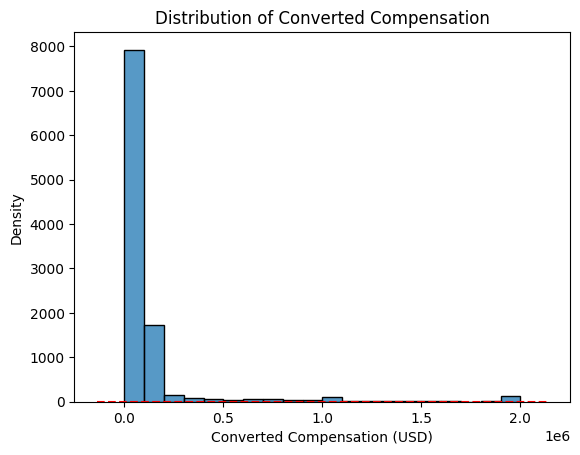

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting KDE plot 
sns.histplot(df["ConvertedComp"], bins=20, kde=False)
sns.kdeplot(df["ConvertedComp"], color='r', linestyle='dashed')

plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.title('Distribution of Converted Compensation')
plt.show()


What is the median of the column `ConvertedComp`?


In [7]:
median_con = df['ConvertedComp'].median(axis=0)
print("Median of CovertComp:", median_con)

Median of CovertComp: 57745.0


How many responders identified themselves only as a **Man**?


In [8]:
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [9]:
df_womancon = df[df['Gender'] == 'Woman']
print("ConvertedComp identified only as a Woman :",df_womancon['ConvertedComp'].median())

ConvertedComp identified only as a Woman : 57708.0


Give the five number summary for the column `Age`?


In [10]:
df['Age'].describe()


count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

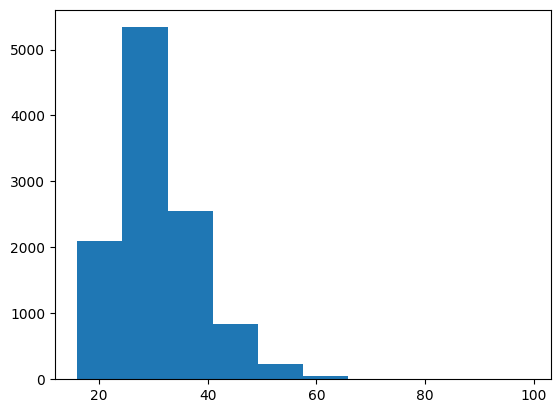

In [11]:
plt.pyplot.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [12]:
median_before = df['ConvertedComp'].median()
median_before

57745.0

<Axes: xlabel='ConvertedComp'>

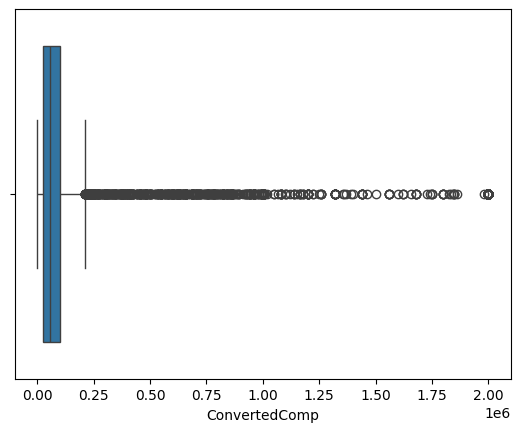

In [13]:
sns.boxplot(x=df['ConvertedComp'],data=df)

Find out the Inter Quartile Range for the column `ConvertedComp`.


<Axes: xlabel='Age'>

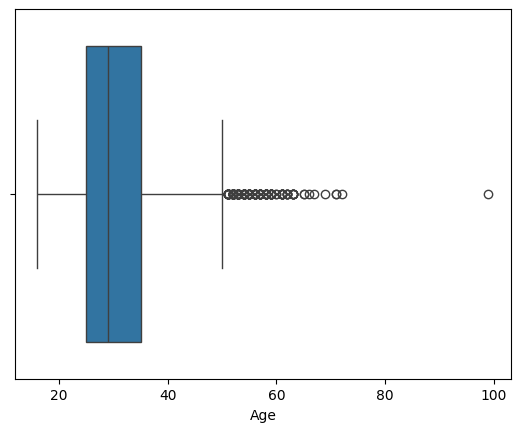

In [14]:
sns.boxplot(x=df['Age'],data=df)

The upper and lower bounds.


In [15]:
df["ConvertedComp"].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

We identify how many outliers are there in the `ConvertedComp` column.


In [16]:
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

We create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
upper_bound = Q3 + (1.5*IQR)
lower_bound = Q1 - (1.5*IQR)
print('upper_bound :', upper_bound, 'lower_bound:', lower_bound )

df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
# Calculate the median ConvertedComp after removing outliers
median_after = df_no_outliers['ConvertedComp'].median()
print("Median ConvertedComp after removing outliers:", median_after)
mean_after = df_no_outliers['ConvertedComp'].mean()
print("Mean ConvertedComp after removing outliers:", mean_after)

upper_bound : 209698.0 lower_bound: -82830.0
Median ConvertedComp after removing outliers: 52704.0
Mean ConvertedComp after removing outliers: 59883.20838915799


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
numeric_df = df.select_dtypes(include=[np.number]) # only numeric columns
correlation_matrix = numeric_df.corr() # correlation matrix
print(correlation_matrix)


               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002181    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001037     0.003510    0.007063   
ConvertedComp    0.002181   0.001037       1.000000     0.021143   -0.033865   
WorkWeekHrs     -0.015314   0.003510       0.021143     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.033865     0.026517    1.000000   
Age              0.004041   0.006970       0.105386     0.036518   -0.020469   

                    Age  
Respondent     0.004041  
CompTotal      0.006970  
ConvertedComp  0.105386  
WorkWeekHrs    0.036518  
CodeRevHrs    -0.020469  
Age            1.000000  


## Mulitivariat Analysis

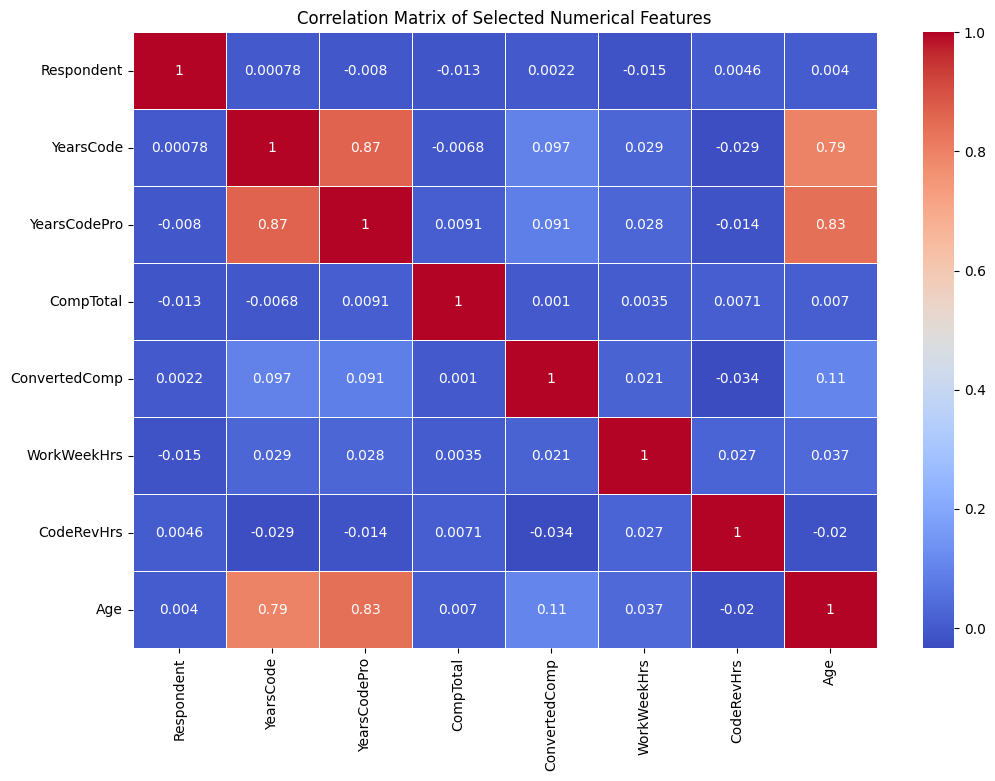

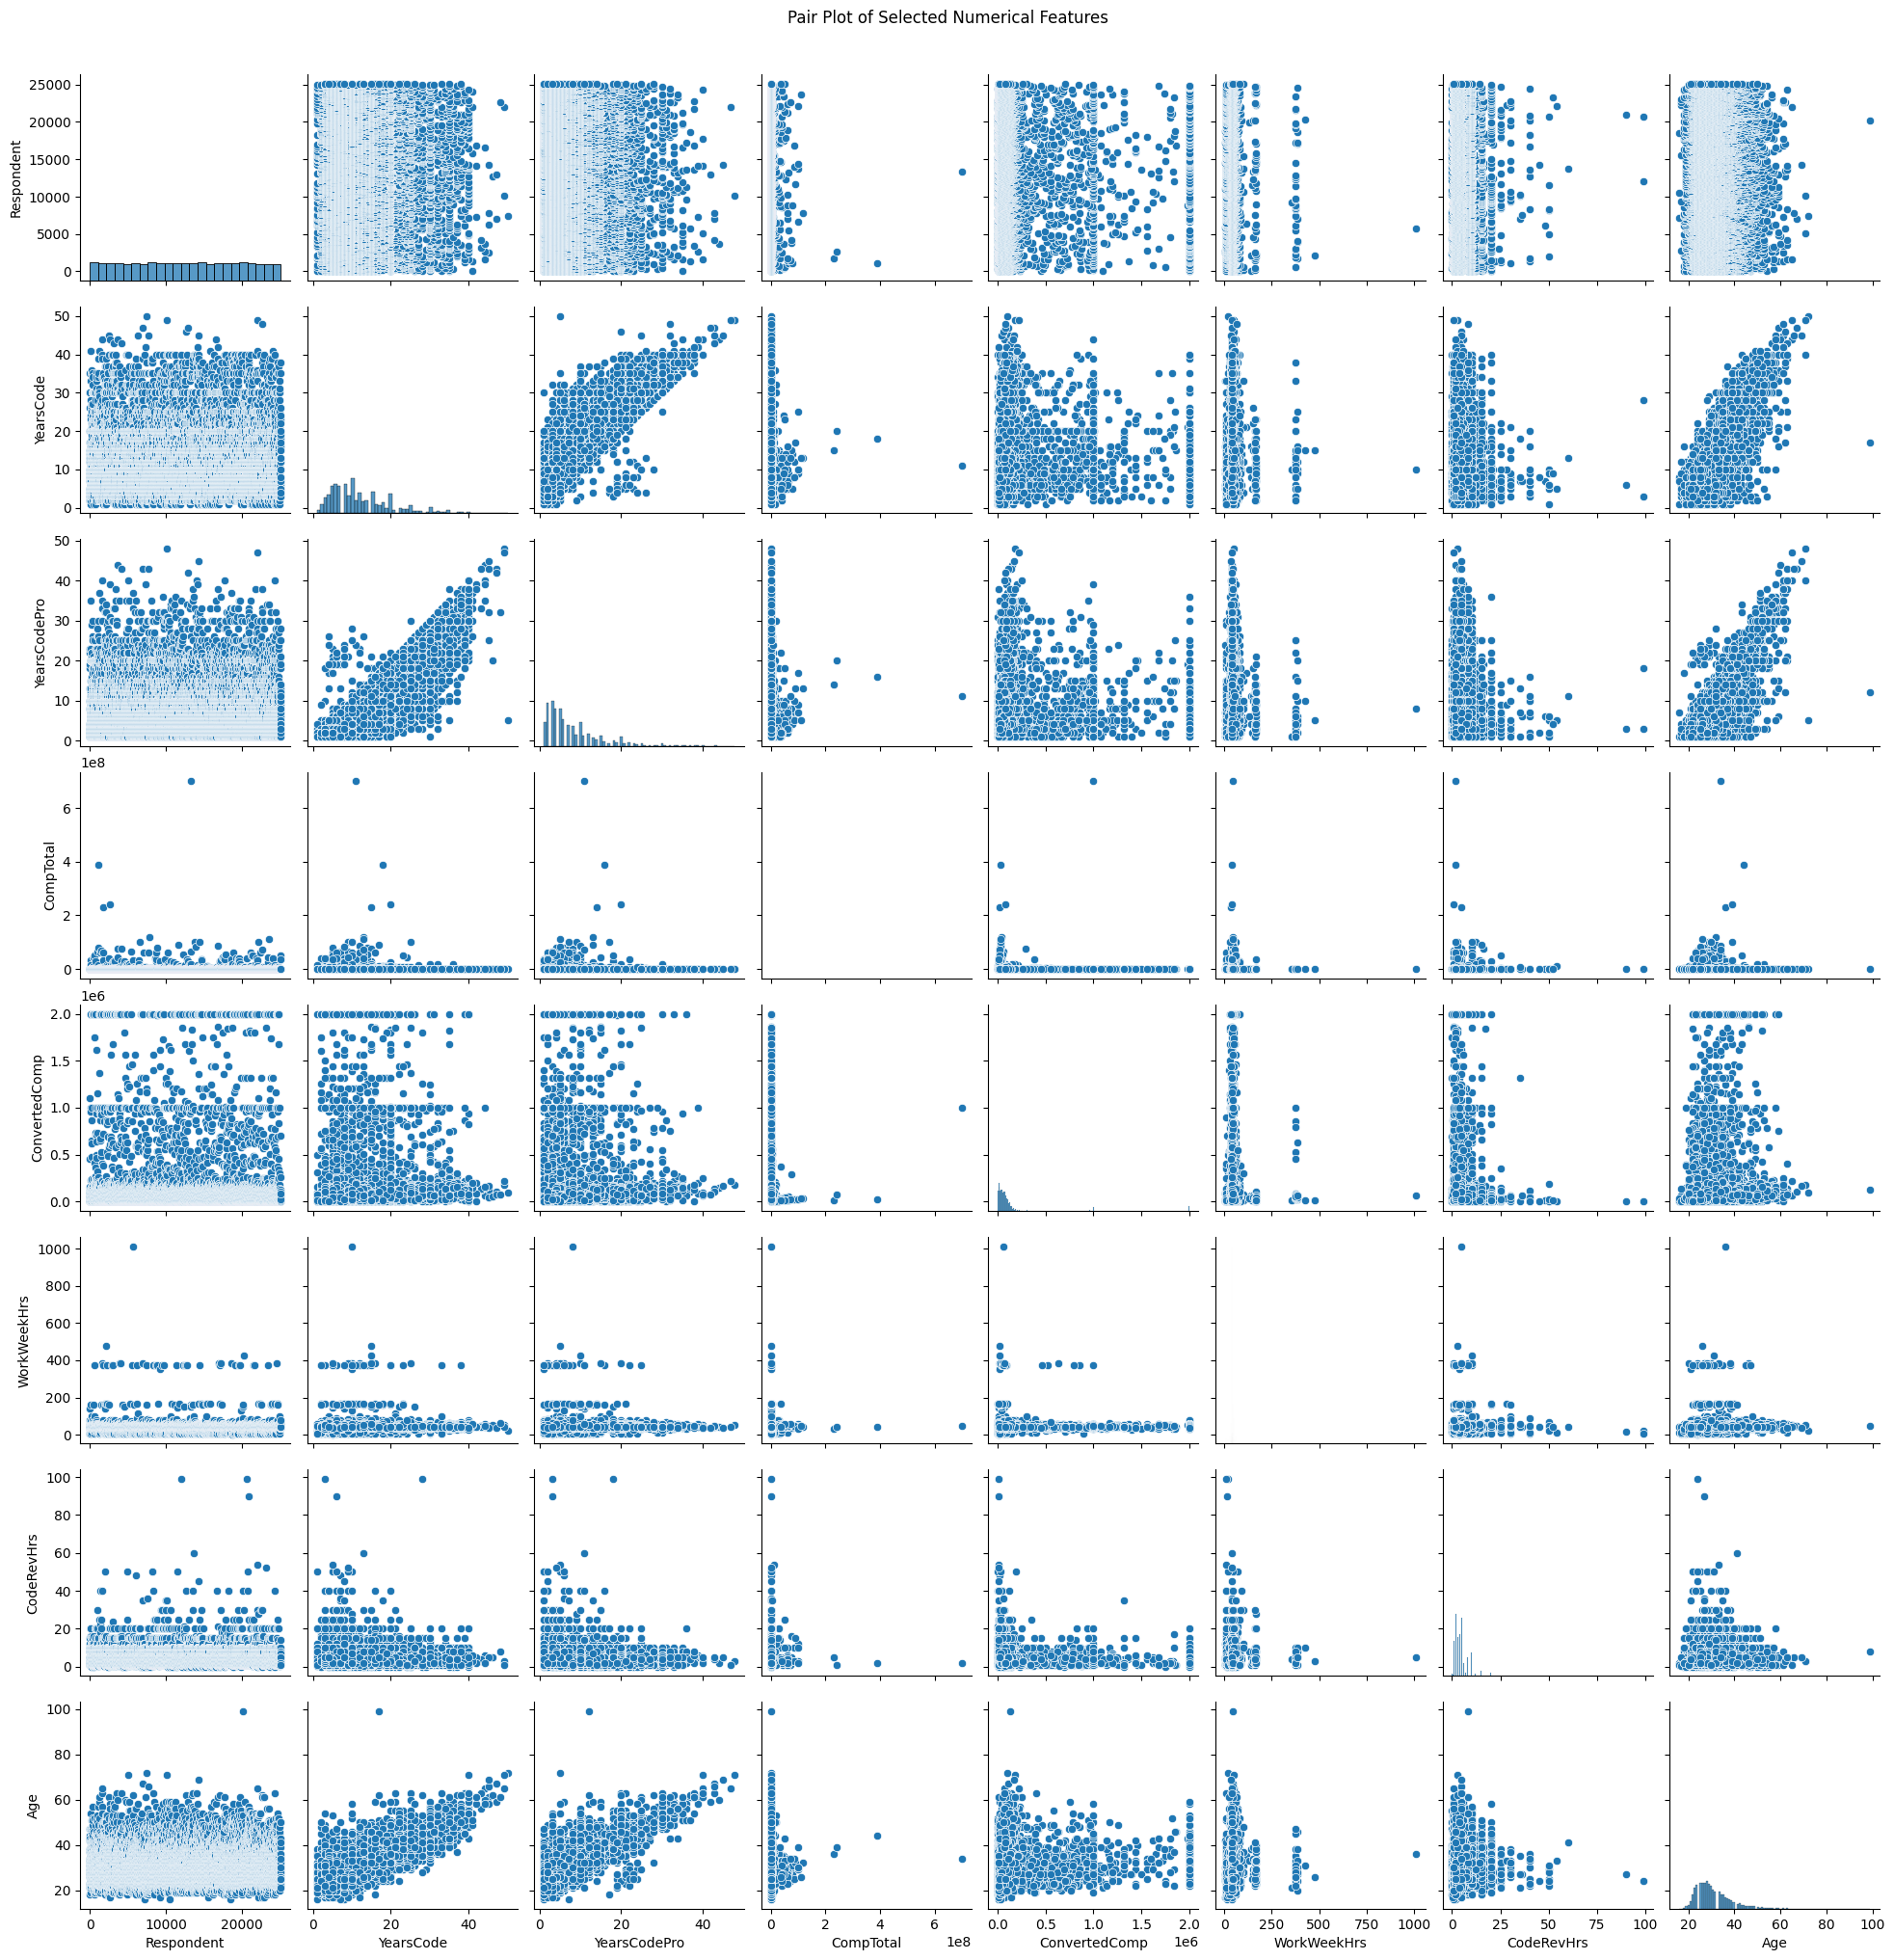

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


# Ensure all selected columns are numeric, coercing any non-numeric values to NaN
numerical_columns = ['ConvertedComp', 'Age', 'YearsCode', 'YearsCodePro', 'WorkWeekHrs', 'CodeRevHrs']

# Convert columns to numeric
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Dropping rows with missing values in these columns
#df_numerical = df[numerical_columns].dropna()

# Correlation Matrix
corr_matrix = df_numerical.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Selected Numerical Features')
plt.show()

# Pair Plot
sns.pairplot(df_numerical)
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()


# Principal Component Analysis (PCA)
PCA is used to reduce the dimensionality of the dataset while preserving as much variance as possible.
- PC1 is the first principal component and captures the largest amount of variability in the data. It is a linear combination of the original variables and explains the most significant portion of the variance.
The direction of PC1 is chosen such that it maximizes the variance of the projected data.
- PC2 is the second principal component and captures the second-largest amount of variability in the data. It is also a linear combination of the original variables.
PC2 is orthogonal (perpendicular) to PC1, ensuring that it captures variance in a different direction.

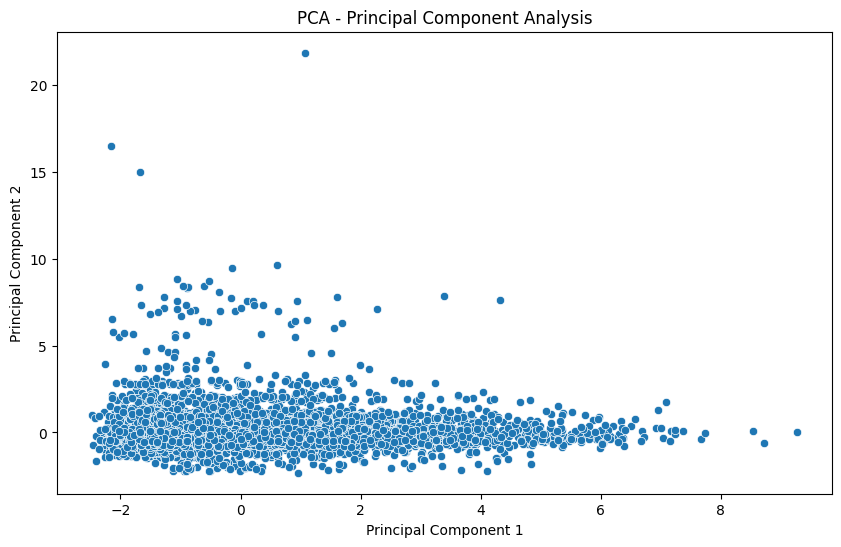

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(df_numerical_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA - Principal Component Analysis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


 ## Multivariate Regression
 Multivariate regression models the relationship between multiple independent variables and a dependent variable.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Defining the dependent variable and independent variables
X = df_numerical.drop(columns=['ConvertedComp'])
y = df_numerical['ConvertedComp']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariate Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 90395407168.44196
R-squared: 0.011424140853357634


# Clustering (K-Means)
Identifying clusters within the dataset and visualizing them using the PCA-reduced components.

C:\Users\feria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.41990425483733584


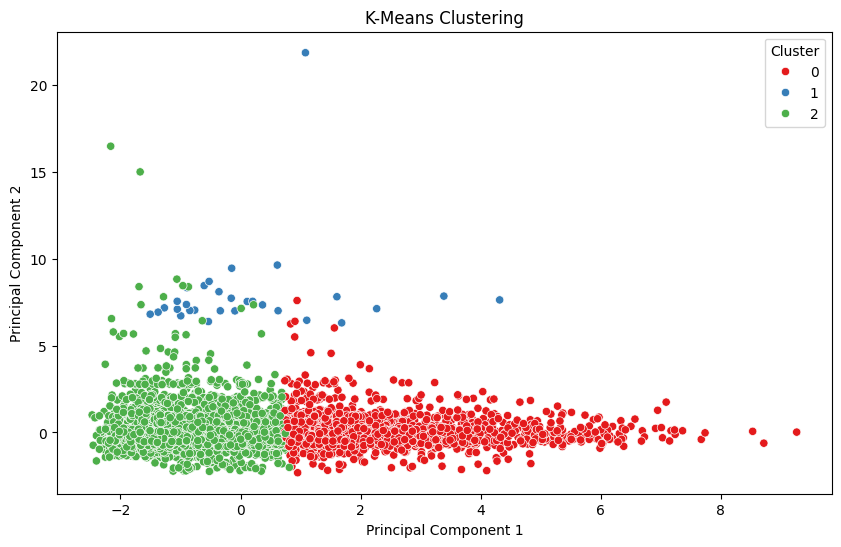

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Assuming 3 clusters for example
kmeans.fit(df_numerical_scaled)

# Adding cluster labels to the dataframe
df_numerical['Cluster'] = kmeans.labels_

# Silhouette Score
sil_score = silhouette_score(df_numerical_scaled, kmeans.labels_)
print(f'Silhouette Score: {sil_score}')

# Combine PCA components with cluster labels
pca_df['Cluster'] = df_numerical['Cluster'].values

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set1', data=pca_df)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()




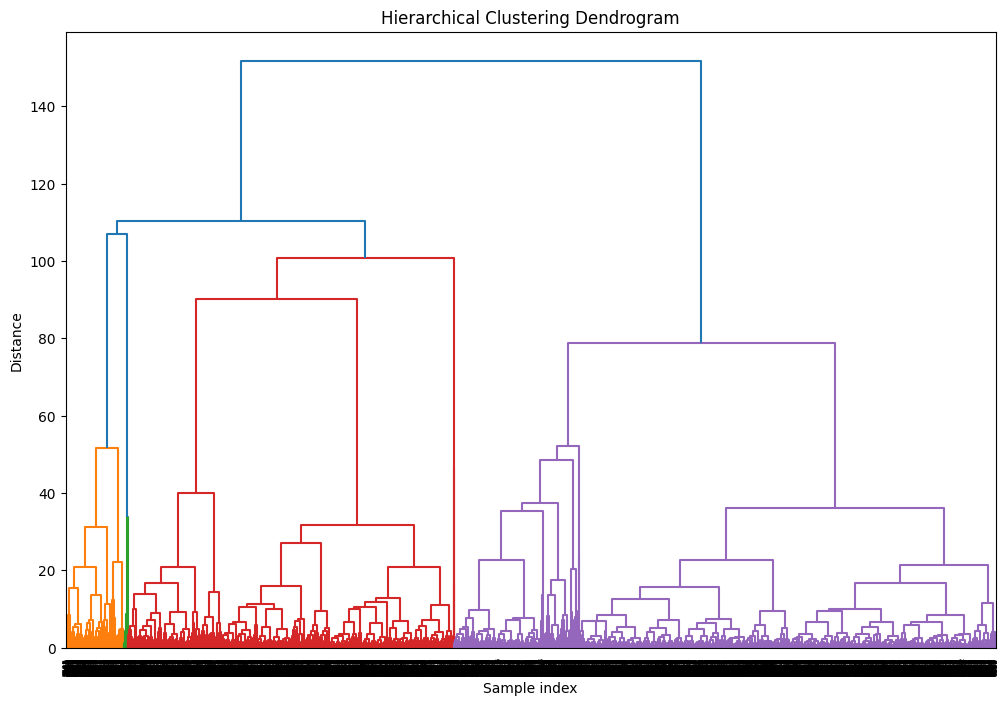

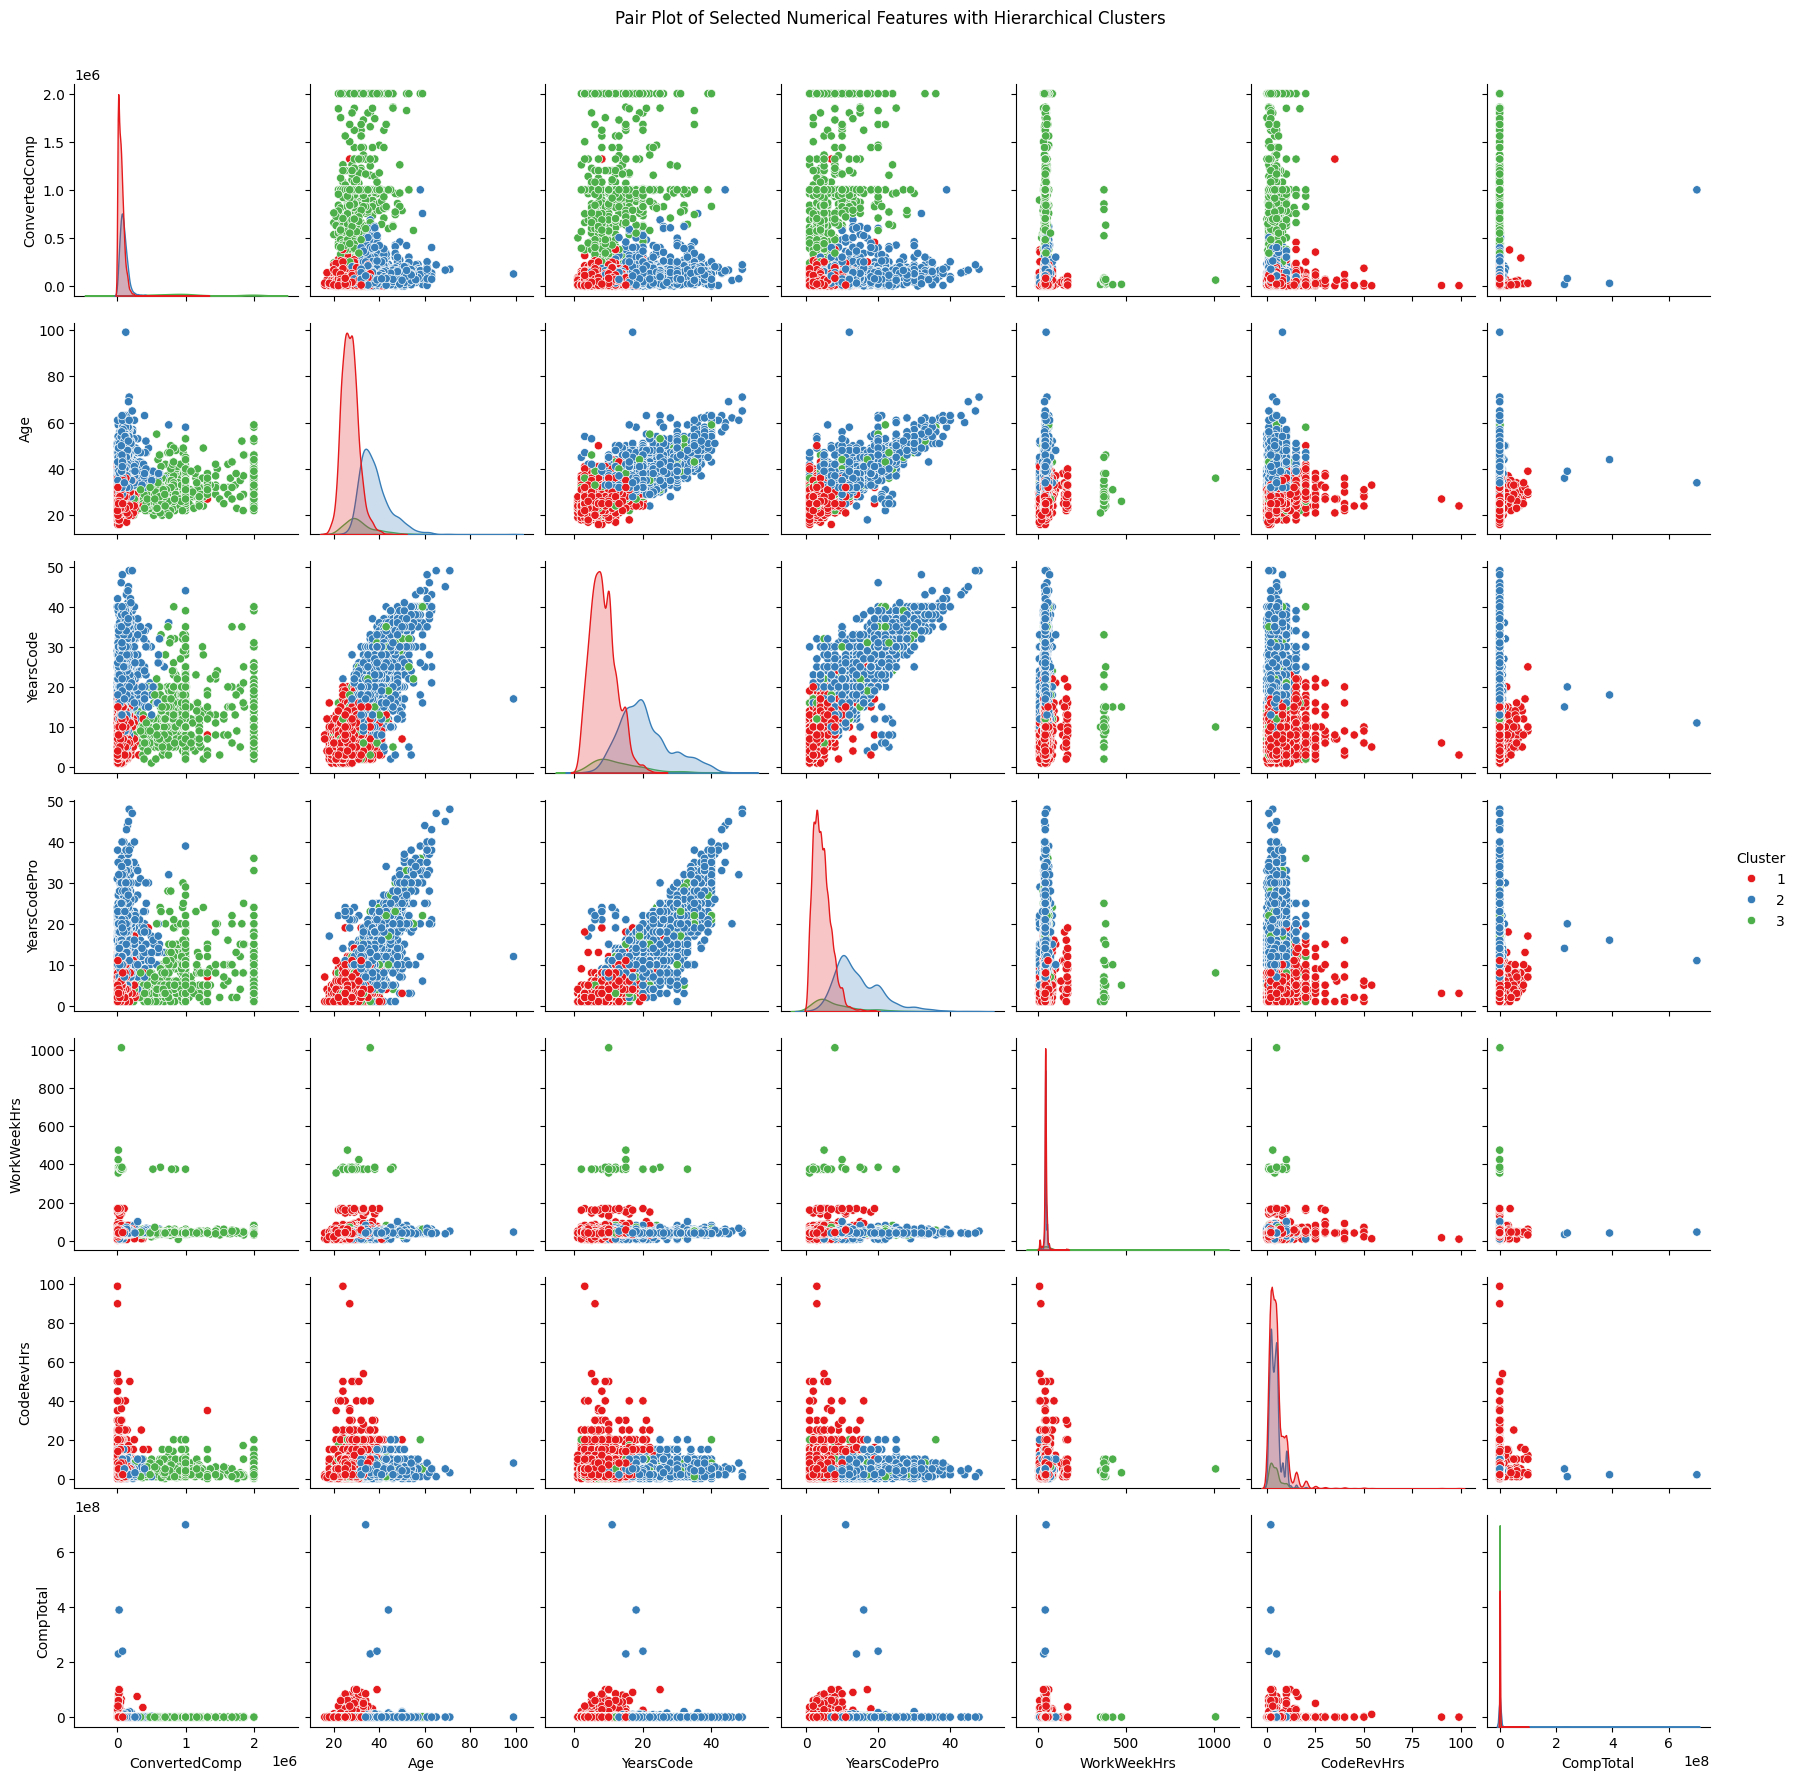

In [30]:

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Ensure all selected columns are numeric, coercing any non-numeric values to NaN
numerical_columns = ['ConvertedComp', 'Age', 'YearsCode', 'YearsCodePro', 'WorkWeekHrs', 'CodeRevHrs', 'CompTotal']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Dropping rows with missing values in these columns
df_numerical = df[numerical_columns].dropna()

# Scaling the data standardize the features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Hierarchical clustering
linked = linkage(df_numerical_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=None, distance_sort='descending', show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# Assigning clusters (choose a number of clusters, e.g., 3)
num_clusters = 3
cluster_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Adding cluster labels to the dataframe
df_numerical['Cluster'] = cluster_labels

# Plotting the clusters in a pairplot
sns.pairplot(df_numerical, hue='Cluster', palette='Set1')
plt.suptitle('Pair Plot of Selected Numerical Features with Hierarchical Clusters', y=1.02)
plt.show()


